# R et C++, c'est possible

In [ ]:
library(Rcpp)
library(inline)

cppFunction('
double crossprodC(NumericVector x, NumericVector y){
 double crp = 0.;
 int n = x.size();
 for(int i=0; i<n; i++) crp += x[i]*y[i];
 return(crp);
}
')

crossprodC

In [ ]:
crossprodC(c(1.5,6.3), c(0.3,4.3))

In [9]:
library(deSolve)
source("ODEsim_init.R")


Attaching package: ‘inline’


The following object is masked from ‘package:Rcpp’:

    registerPlugin




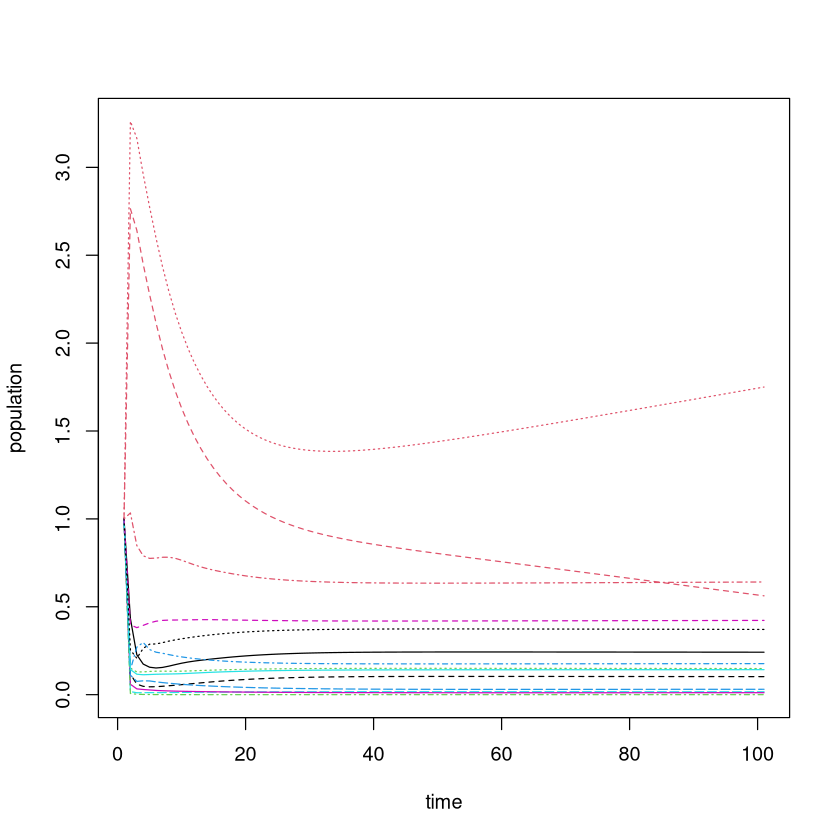

In [11]:
output <-as.data.frame(
        ode(func = foodwebmodC, y = State, parms = Pars, times = Time)
    )
matplot(output[,-1], type = "l", xlab = "time", ylab = "population")

# Monitorer le temps de calcul

In [1]:
x <- runif(100)
system.time( for(i in 1:100){sqrt(x)} )

   user  system elapsed 
  0.006   0.000   0.005 

In [2]:
system.time( for(i in 1:1e5){x^(1./2.)} )[3] # temps écoulé

elapsed 
  0.982

In [3]:
library(microbenchmark)
print(microbenchmark( 
    sqrt(x), 
    x^(1./2.), 
    times = 1e5))

Unit: microseconds
    expr   min    lq      mean median     uq      max neval
 sqrt(x) 1.125 1.425  2.116114  1.891  2.216 10990.16 1e+05
 x^(1/2) 6.182 7.447 10.269493 10.320 10.899 12833.38 1e+05


In [4]:
x=9
system.time( sqrt(x) )[3]

elapsed 
      0

In [5]:
print(microbenchmark(
 sqrt(x),
 x^0.5,
 x^(1./2.),
 exp(log(x)/2)
))

Unit: nanoseconds
          expr min     lq    mean median     uq   max neval
       sqrt(x) 180  470.5  655.00  563.0  634.0 11007   100
         x^0.5 324  642.0  801.23  780.0  899.5  4309   100
       x^(1/2) 568 1164.0 1297.71 1297.5 1480.0  2565   100
 exp(log(x)/2) 480 1223.0 1495.70 1372.0 1528.0 18125   100


# Profilage de code

In [8]:
is.prime <- function(n) n == 2L || 
                        all(n %% 2L:ceiling(sqrt(n)) != 0)
all.prime <- function(n){
    v <- integer(0)
    for(i in 2:n) if(is.prime(i)) v <- c(v,i)
    v
}

Rprof("BIGFILE.out", interval = 0.001)
prime.numbers <- all.prime(1e5)
Rprof(NULL)
summaryRprof("BIGFILE.out")
#prime.numbers

$by.self
                self.time self.pct total.time total.pct
"all.prime"         0.257    55.03      0.413     88.44
"is.prime"          0.149    31.91      0.151     32.33
"eval"              0.053    11.35      0.466     99.79
"structure"         0.002     0.43      0.002      0.43
"h"                 0.001     0.21      0.004      0.86
"tryInline"         0.001     0.21      0.004      0.86
"cb$putcode"        0.001     0.21      0.001      0.21
"delayedAssign"     0.001     0.21      0.001      0.21
"lapply"            0.001     0.21      0.001      0.21
"setHook"           0.001     0.21      0.001      0.21

$by.total
                       total.time total.pct self.time self.pct
"doTryCatch"                0.467    100.00     0.000     0.00
"evaluate_call"             0.467    100.00     0.000     0.00
"evaluate"                  0.467    100.00     0.000     0.00
"executor$execute"          0.467    100.00     0.000     0.00
"handle_shell"              0.467    100.00     0.000     0.00
"IRkernel::main"            0.467    100.00     0.000     0.00
"kernel$run"                0.467    100.00     0.000     0.00
"tryCatch"                  0.467    100.00     0.000     0.00
"tryCatchList"              0.467    100.00     0.000     0.00
"tryCatchOne"               0.467    100.00     0.000     0.00
"eval"                      0.466     99.79     0.053    11.35
"handle"                    0.466     99.79     0.000     0.00
"timing_fn"                 0.466     99.79     0.000     0.00
"try"                       0.466     99.79     0.000     0.00
"withCallingHandlers"       0.466     99.79     0.000     0.00
"withVisible"               0.466     99.79     0.000     0.00
"all.prime"                 0.413     88.44     0.257    55.03
"is.prime"                  0.151     32.33     0.149    31.91
"cmpfun"                    0.007      1.50     0.000     0.00
"compiler:::tryCmpfun"      0.007      1.50     0.000     0.00
"h"                         0.004      0.86     0.001     0.21
"tryInline"                 0.004      0.86     0.001     0.21
"cmp"                       0.004      0.86     0.000     0.00
"cmpCall"                   0.004      0.86     0.000     0.00
"genCode"                   0.004      0.86     0.000     0.00
"make.functionContext"      0.003      0.64     0.000     0.00
"structure"                 0.002      0.43     0.002     0.43
"make.toplevelContext"      0.002      0.43     0.000     0.00
"cb$putcode"                0.001      0.21     0.001     0.21
"delayedAssign"             0.001      0.21     0.001     0.21
"lapply"                    0.001      0.21     0.001     0.21
"setHook"                   0.001      0.21     0.001     0.21
"cmpBuiltinArgs"            0.001      0.21     0.000     0.00
"cmpForBody"                0.001      0.21     0.000     0.00
"cmpSymbolAssign"           0.001      0.21     0.000     0.00
"findCenvVar"               0.001      0.21     0.000     0.00
"findLocalsList"            0.001      0.21     0.000     0.00
"findLocalsList1"           0.001      0.21     0.000     0.00
"FUN"                       0.001      0.21     0.000     0.00
"funEnv"                    0.001      0.21     0.000     0.00
"getInlineInfo"             0.001      0.21     0.000     0.00
"remove_hooks"              0.001      0.21     0.000     0.00

$sample.interval
[1] 0.001

$sampling.time
[1] 0.467

In [ ]:
is.prime <- function(n) n == 2L || 
                        all(n %% 2L:ceiling(sqrt(n)) != 0)
all.prime <- function(n){
    v <- rep(0L, 0.5*n*log(n))
    iprime <- 1
    for(i in 2:n) if(is.prime(i)){ 
        v[iprime] <- i
        iprime <- iprime+1
    }
    v
}

Rprof("Rprof.out", interval = 0.001)
prime.numbers <- all.prime(1e5)
Rprof(NULL)
summaryRprof("Rprof.out")

# Monitorer la mémoire

In [ ]:
library(pryr)
v <- 1:1e8 # vecteur d'entier
object_size(v)

In [ ]:
v[1]<-0 # au lieu de 0L => conversion en réel signalée par tracemem

object_size(v)

# Fonctions vectorisées

In [ ]:
library(microbenchmark)
myRowSums <- function(mat){
    sums <- rep(0,nrow(mat))
    for (i in 1:nrow(mat))
      for (j in 1:ncol(mat))
        sums[i] <- sums[i] + mat[i,j]
    sums
}

mat = matrix(rnorm(1e3*1e3),1e3,1e3)
print(microbenchmark(
    myRowSums(mat),
    apply(mat,1,sum),
    rowSums(mat),
    times=10
))

# Préallocation

In [ ]:
noprealloc <- function(n){
 result <- c()
 for (i in 1:n) result <- c(result,rnorm(1)) 
  result
}
withprealloc <- function(n){
 result <- double(n)  # préallocation de la mémoire
 for (i in 1:n) result[i] <- rnorm(1)
  result
}

print(microbenchmark(
 noprealloc(1e4),    
 withprealloc(1e4),
 times=10
))

# Travailler moins pour gagner plus

In [ ]:
library(microbenchmark)
dtf <- data.frame(poids=rchisq(100000,10),
                  groupe=factor(sample(1:10,100000,rep=T)))
head(dtf)

In [ ]:
# préallocation du résultat 
r <- data.frame(poids=1:10, mean=rep(0,10), sd=rep(0,10))

print(microbenchmark(
for(groupe in 1:10){
 tmp <- dtf$poids[dtf$groupe==groupe]
 r$mean[groupe] <- mean(tmp)
 r$sd[groupe] <- sd(tmp)
}, times=10))

In [ ]:
print(microbenchmark(
 aggregate(poids ~ groupe, data=dtf, 
           FUN = function(x) c(mean=mean(x), sd=sd(x))), 
 times=10
))

In [ ]:
library(plyr)
print(microbenchmark(
 ddply(dtf, ~groupe, summarise, mean=mean(poids),sd=sd(poids)), 
 times=10
))

In [ ]:
library(dplyr)
print(microbenchmark(
 dtf %>% group_by(groupe) %>% summarise(mean(poids),sd(poids)), 
 times=10
))

In [ ]:
library(data.table)
dt <- data.table(dtf)
print(microbenchmark(
 dt[,list(mean=mean(poids),sd=sd(poids)),by=groupe], 
 times=10
))

# Changer d'algorithme

In [ ]:
all.ids <- sample(1e9, 1e7) # identifiants tirés au hasard
head(all.ids)

In [ ]:
library(microbenchmark)
id <- sample(1e9,1)
print(microbenchmark( 
 id %in% all.ids,
 any(all.ids==id),
 times=25
))

In [ ]:
system.time( all.ids.sorted <- sort(all.ids) )[3]

In [ ]:
log(1e9)


In [ ]:
library(gtools)
print(microbenchmark( 
 binsearch(fun=function(i) all.ids.sorted[i]-id, 
           range=c(1,length(all.ids.sorted)))
))

In [ ]:
log(1e7)

# Interfacer R et C++

In [ ]:
sumR <- function(x){
    n <- length(x)
    total <- 0
    for(i in 1:n) total <- total+x[i]
    return(total)
}

In [ ]:
library(Rcpp)
library(inline)
cppFunction('
double sumC(NumericVector x) {
 int n = x.size();
 double total = 0;
 for(int i = 0; i < n; ++i) total += x[i];
 return total;
}
')

In [ ]:
sumC

In [ ]:
v <- runif(1e6)
library(microbenchmark)
print(microbenchmark(    
    sumR(v),
    sum(v),
    sumC(v),
    times=25
))

In [ ]:
sum

In [ ]:
library(inline)
library(Rcpp)

cppFunction('int sixtythree(){
 return(63);
}
')
sixtythree()
sixtythree

In [ ]:
cppFunction('double prodInC(double x, double y){
 return(x*y);
}
')
prodInC(1.5, 0.3)

In [ ]:
cppFunction('
double crossprodC(NumericVector x, NumericVector y){
 double crp = 0.;
 int n = x.size();
 for(int i=0; i<n; i++) crp += x[i]*y[i];
 return(crp);
}
')
crossprodC(c(1.5,6.3), c(0.3,4.3))

In [ ]:
cppFunction('
NumericMatrix subMatrix(LogicalVector x, NumericMatrix mat){
 int nr = mat.nrow(), nc = mat.ncol();
 if (x.size() != nr)  warning("Inconsistent dimensions");
 int nr2 = 0;
 for(int i=0; i<nr; i++) if(x[i]) nr2++;
 NumericMatrix mat2(nr2,nc);
 int i2 = 0;
 for(int i=0; i<nr; i++)
  if(x[i]){
   for(int j=0; j<nc; j++)
    mat2(i2,j) = mat(i,j);
   i2++;
  }
 return(mat2);
}
')
subMatrix(c(TRUE,FALSE,TRUE), rbind(c(1.,2),c(3.,4.),c(5.,6.)))

In [ ]:
cppFunction('
NumericVector matvecprod(NumericMatrix mat, NumericVector vec){
    int n = vec.size();
    NumericVector result(n);
    for(int i=0; i<n; i++){
        double sum=0.;
        for(int j=0; j<n; j++){
            sum += mat(i,j)*vec(j);
        }
        result[i] = sum;
    }
    return(result);
}')
matvecprod(matrix(runif(25),5,5), runif(5))